In [19]:
import pandas as pd

In [20]:
# loading clean data for analysis

In [21]:
# creating new column Percentage from all available three sciores and creating grade from avg scores

In [22]:
df = pd.read_csv('../data_clean/StudentsPerformance.csv')

print(df.to_string())

     Unnamed: 0  gender race/ethnicity parental level of education         lunch test preparation course  math score  reading score  writing score
0             0  female        group B           bachelor's degree      standard                    none          72             72             74
1             1  female        group C                some college      standard               completed          69             90             88
2             2  female        group B             master's degree      standard                    none          90             95             93
3             3    male        group A          associate's degree  free/reduced                    none          47             57             44
4             4    male        group C                some college      standard                    none          76             78             75
5             5  female        group B          associate's degree      standard                    none          71  

In [23]:
df["Percentage"]=(df["math score"]+df["reading score"]+df["writing score"])/3
print(df["Percentage"])

0      72.666667
1      82.333333
2      92.666667
3      49.333333
4      76.333333
         ...    
995    94.000000
996    57.333333
997    65.000000
998    74.333333
999    83.000000
Name: Percentage, Length: 1000, dtype: float64


In [24]:
df['Percentage'] = (df['math score']+df['reading score']+df['writing score'])/3
print(df["Percentage"])


def Grade(Percentage):
    if (Percentage >= 95):return 'O'
    if (Percentage >= 81):return 'A'
    if (Percentage >= 71):return 'B'
    if (Percentage >= 61):return 'C'
    if (Percentage >= 51):return 'D'
    if (Percentage >= 41):return 'E'
    else: return 'F'
    
df["grade"] = df.apply(lambda x : Grade(x["Percentage"]),axis=1)

0      72.666667
1      82.333333
2      92.666667
3      49.333333
4      76.333333
         ...    
995    94.000000
996    57.333333
997    65.000000
998    74.333333
999    83.000000
Name: Percentage, Length: 1000, dtype: float64


In [25]:
print(df)

     Unnamed: 0  gender race/ethnicity parental level of education  \
0             0  female        group B           bachelor's degree   
1             1  female        group C                some college   
2             2  female        group B             master's degree   
3             3    male        group A          associate's degree   
4             4    male        group C                some college   
..          ...     ...            ...                         ...   
995         995  female        group E             master's degree   
996         996    male        group C                 high school   
997         997  female        group C                 high school   
998         998  female        group D                some college   
999         999  female        group D                some college   

            lunch test preparation course  math score  reading score  \
0        standard                    none          72             72   
1        standa

In [26]:
# using Seaborn for analysis

In [27]:
import seaborn as sns
import numpy as np

/var/folders/pp/34bm52d120z1mf9hgffql3940000gn/T/ipykernel_15845/3393974511.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x ='gender', y ='Percentage', data = df,


<Axes: xlabel='gender', ylabel='Percentage'>

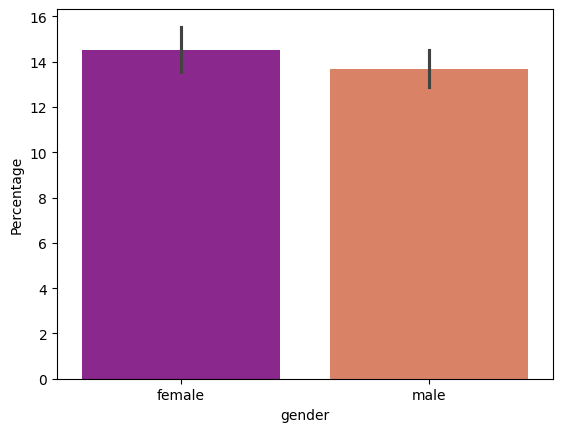

In [28]:
sns.barplot(x ='gender', y ='Percentage', data = df,
            palette ='plasma', estimator = np.std)

In [29]:
df['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

In [30]:
import matplotlib.pyplot as plt

([<matplotlib.patches.Wedge at 0x118057ad0>,
 [Text(-1.1980818587083752, -0.06782226650507366, 'Female'),
  Text(1.1980818587083752, 0.0678222665050735, 'Male')],
 [Text(-0.698881084246552, -0.03956298879462629, '51.80%'),
  Text(0.698881084246552, 0.039562988794626205, '48.20%')])

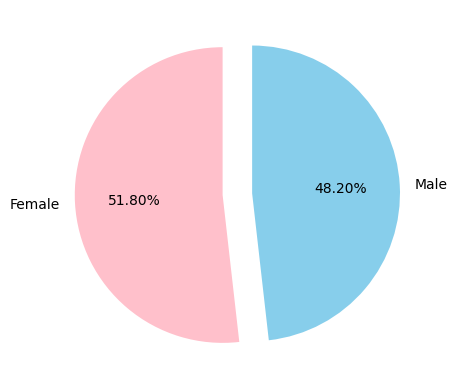

In [31]:
labels=['Female', 'Male']

plt.pie(df['gender'].value_counts(),labels=labels,explode=[0.1,0.1],
        autopct='%1.2f%%',colors=['pink','skyblue'], startangle=90)

In [32]:
# Below countplot illustares the grade secured by female and male 

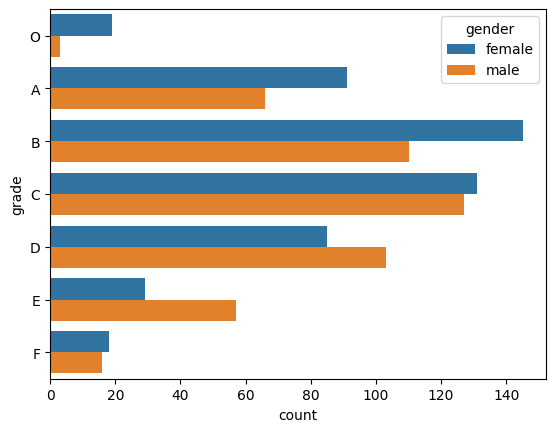

In [33]:
ax = sns.countplot(y="grade", hue="gender", data=df, order=["O","A","B","C","D","E","F"])
fig=ax.get_figure()
fig.savefig("../results/Grade_Analysis_gender.png")

In [34]:
# Below countplot illustrates the grades secured by students grouped by ethinicity

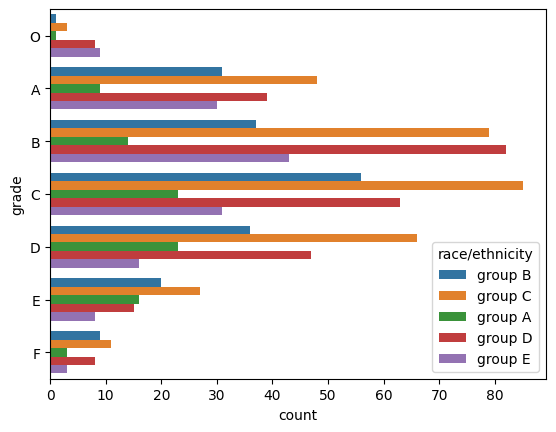

In [35]:
ax = sns.countplot(y="grade", hue="race/ethnicity", data=df, order=["O","A","B","C","D","E","F"])
fig=ax.get_figure()
fig.savefig("../results/Grade_Analysis_race.png")

In [36]:
# below countplot illustates the gardes secured by stuidents and their parenta; level of

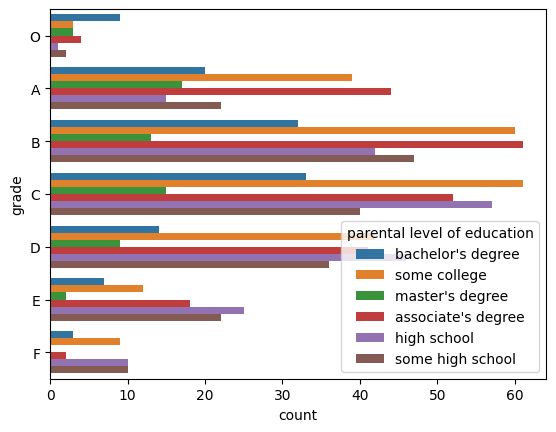

In [37]:
ax = sns.countplot(y="grade", hue="parental level of education", data=df, order=["O","A","B","C","D","E","F"])
fig=ax.get_figure()
fig.savefig("../results/Grade_Analysis_Parental_education.png")

In [38]:
# below countplot illustrates the grade secured by students grouped by their lunch. It shows how lunch
#effects teh student poerformance.

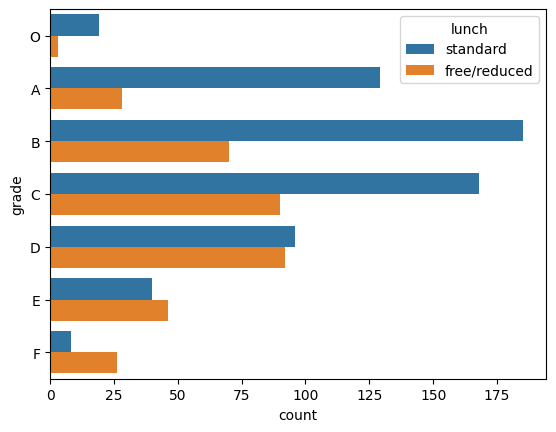

In [39]:
ax = sns.countplot(y="grade", hue="lunch", data=df, order=["O","A","B","C","D","E","F"])
fig=ax.get_figure()
fig.savefig("../results/Grade_Analysis_lunch.png")

In [40]:
# Below count plot illustrates hoe course completion effects the student grade

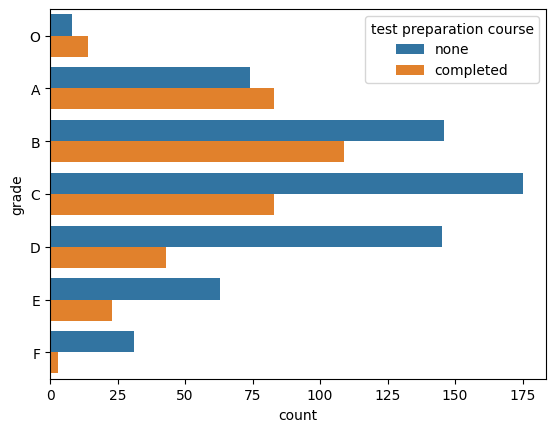

In [41]:
ax = sns.countplot(y="grade", hue="test preparation course", data=df, order=["O","A","B","C","D","E","F"])
fig=ax.get_figure()
fig.savefig("../results/Grade_Analysis_test_prepartion.png")

In [42]:
# below plot illustrates the distibution of avg marks or percentage of score secured by all students.
#we can see more students scored percentage between 50 to 80

/var/folders/pp/34bm52d120z1mf9hgffql3940000gn/T/ipykernel_15845/497175766.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(df['Percentage'], kde = False, color ='green', bins = 30)


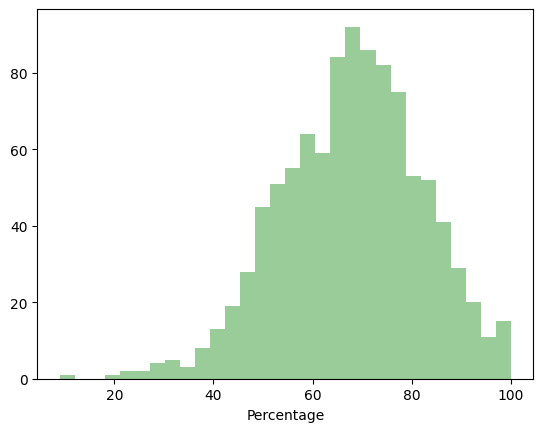

In [43]:
ax=sns.distplot(df['Percentage'], kde = False, color ='green', bins = 30)
fig=ax.get_figure()
fig.savefig("../results/Distribution_percentage.png")

In [44]:
# below scatter plot illustrates how the relation between avg score and math score and grouped by gender

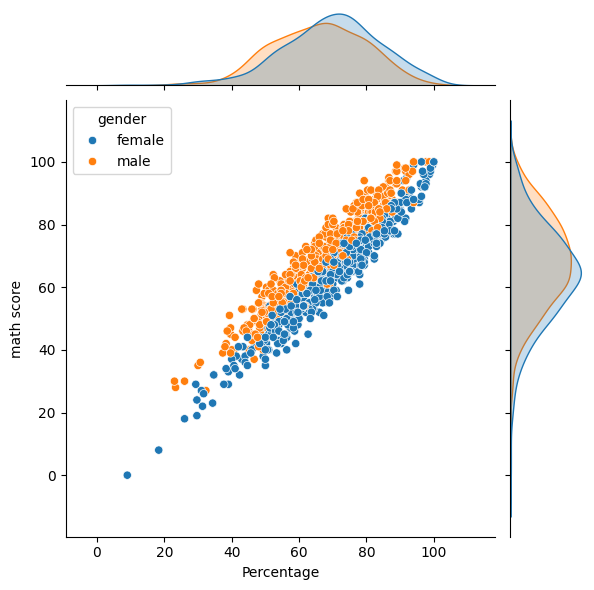

In [45]:
ax=sns.jointplot(x ='Percentage', y ='math score',hue="gender", data = df)

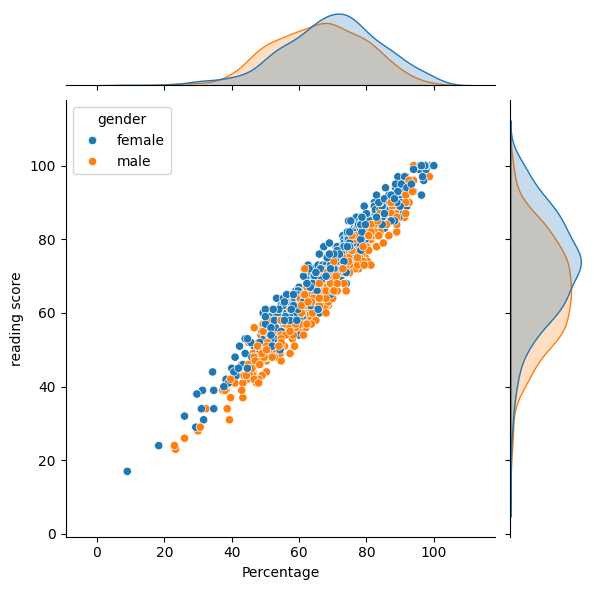

In [46]:
ax=sns.jointplot(x ='Percentage', y ='reading score',hue="gender", data = df)

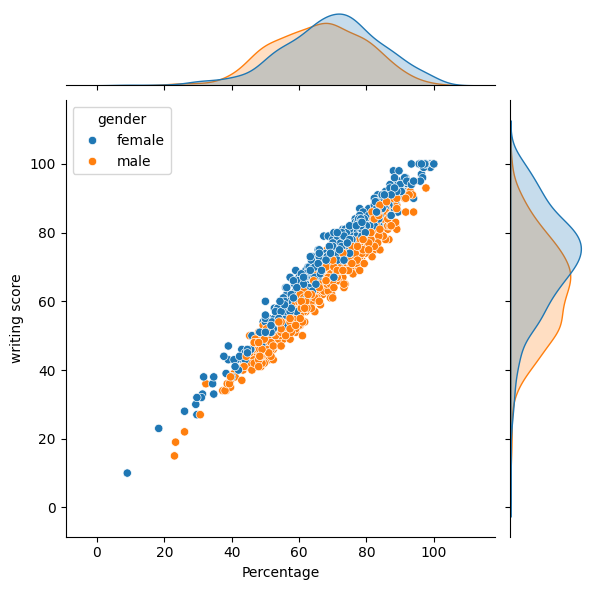

In [47]:
ax=sns.jointplot(x ='Percentage', y ='writing score',hue="gender", data = df)